RFM:

`Recency`: how recently a customer has purchased

`Frequency`: how often they purchased 

`Monetary`: how much the customer spends


In [2]:
#importing all relevant liabraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
data = pd.read_csv("Fashion_Retail_Sales.csv", sep=",", encoding="ISO-8859-1", header=0)
data

,CustomerID,Description,PurchaseAmount,InvoiceDate,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,NaN,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


In [4]:
#Checking null values
data.isnull().sum()

CustomerID          0
Description         0
PurchaseAmount    650
InvoiceDate         0
Review Rating     324
Payment Method      0
dtype: int64

In [5]:
#Cleaning Null values
data = data.dropna()

In [6]:
data.isnull().sum()

CustomerID        0
Description       0
PurchaseAmount    0
InvoiceDate       0
Review Rating     0
Payment Method    0
dtype: int64

In [7]:
data.dropna()

,CustomerID,Description,PurchaseAmount,InvoiceDate,Review Rating,Payment Method
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card
...,...,...,...,...,...,...
3394,4040,Tank Top,113.0,2023-01-20,1.2,Credit Card
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


# Preparing data for modelling


In [8]:
#first creating the column indicating revenue contributed per customer
data['monetary'] = data['PurchaseAmount']
data.head()

,CustomerID,Description,PurchaseAmount,InvoiceDate,Review Rating,Payment Method,monetary
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2456.0
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2102.0
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,3126.0
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,3003.0
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,2914.0


In [9]:
monetary_contributed = data.groupby('CustomerID')['monetary'].sum()
monetary_contributed = monetary_contributed.reset_index()
monetary_contributed.head()

,CustomerID,monetary
0,3957,978.0
1,3958,1210.0
2,3959,1824.0
3,3960,1262.0
4,3961,1592.0


In [10]:
frequency = data.groupby('CustomerID')['InvoiceDate'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceDate
0,3957,10
1,3958,16
2,3959,17
3,3960,13
4,3961,15


In [11]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%Y-%m-%d')
data['duration'] = data['InvoiceDate'].max() - data['InvoiceDate']
data['duration']


1       82 days
2      192 days
3      200 days
4      308 days
5      294 days
         ...   
3394   254 days
3395    84 days
3396   199 days
3398   273 days
3399   193 days
Name: duration, Length: 2487, dtype: timedelta64[ns]

In [12]:
data['InvoiceDate'].max()


Timestamp('2023-10-01 00:00:00')

In [13]:
recency = data.groupby('CustomerID')['duration'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,duration
0,3957,121 days
1,3958,17 days
2,3959,48 days
3,3960,17 days
4,3961,33 days



Missing Values:
recency      0
frequency    0
monetary     0
dtype: int64
Number of clusters: 2, Silhouette Score: 0.31255566177358923
Number of clusters: 3, Silhouette Score: 0.3004264889241433
Number of clusters: 4, Silhouette Score: 0.3191896523995019
Number of clusters: 5, Silhouette Score: 0.33414126027489416
Number of clusters: 6, Silhouette Score: 0.33919737839295694
Number of clusters: 7, Silhouette Score: 0.35199991978919515
Number of clusters: 8, Silhouette Score: 0.3372309452043521
Number of clusters: 9, Silhouette Score: 0.34084855445482676
Number of clusters: 10, Silhouette Score: 0.3005692001514774


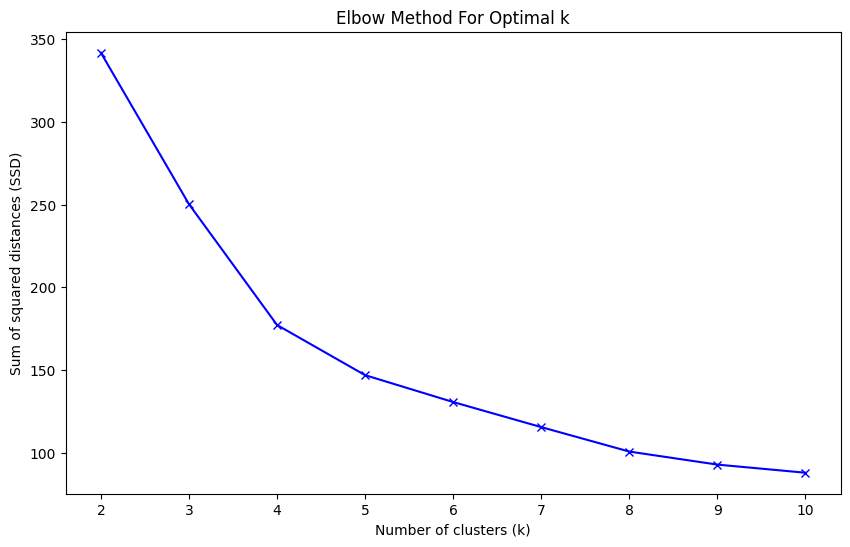

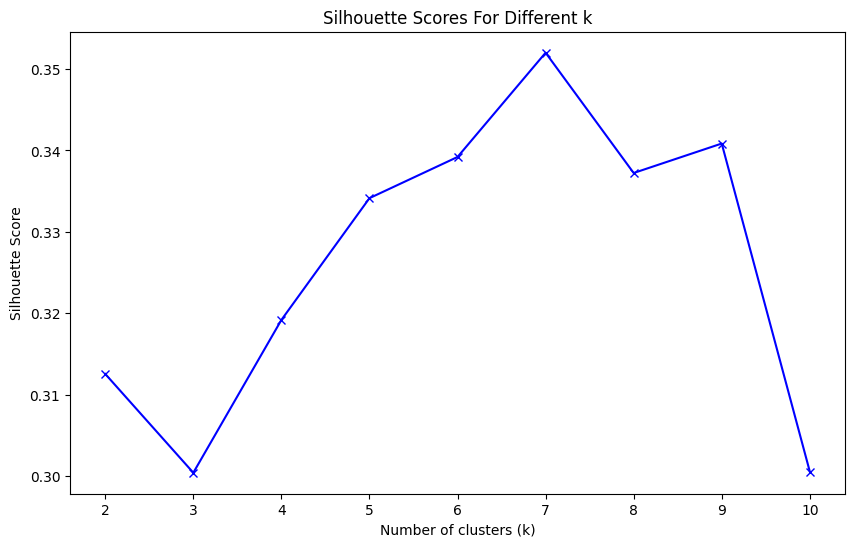

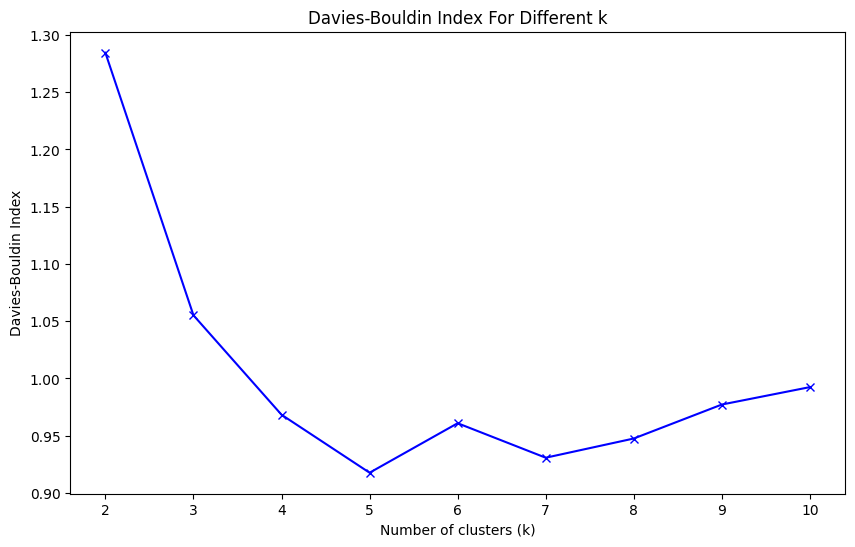

In [14]:
#merging data
rf = pd.merge(monetary_contributed, frequency, on='CustomerID', how='inner')
rfm = pd.merge(rf, recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'monetary', 'frequency', 'recency']
rfm['recency'] = rfm['recency'].dt.days
rfm.head()

# Select the relevant columns for clustering
columns_for_clustering = ['recency', 'frequency', 'monetary']
X = rfm[columns_for_clustering]

# Check for missing values and handle them (if any)
print("\nMissing Values:")
print(X.isnull().sum())

# Fill missing values if necessary (example: filling with median)
X = X.fillna(X.median())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement the Elbow Method to find the optimal number of clusters
ssd = []
silhouette_scores = []
dbi_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    dbi_avg = davies_bouldin_score(X_scaled, kmeans.labels_)
    dbi_scores.append(dbi_avg)
    
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.show()

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(K, dbi_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index For Different k')
plt.show()

Best Random Seed: 6 with SSE: 236.46542540086233


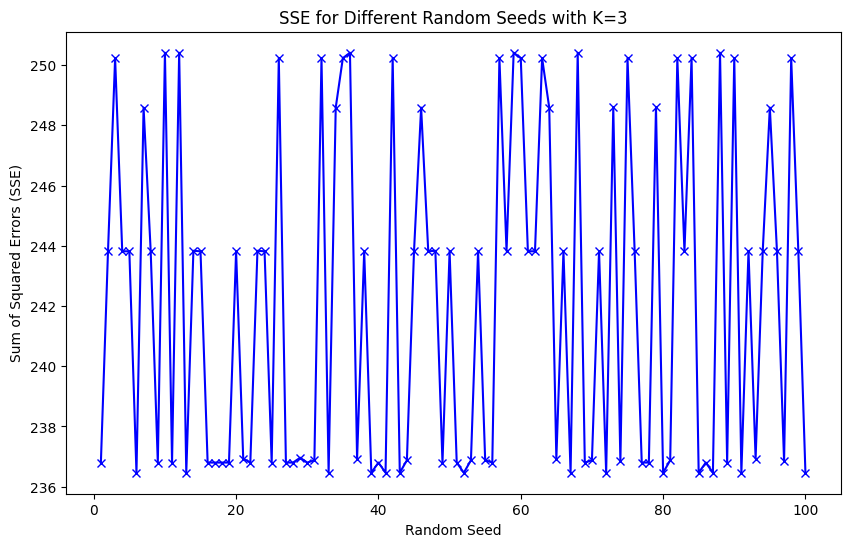

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the number of clusters
K = 3

# Set the range for random seeds
random_seeds = range(1, 101)

# Initialize variables to store the best seed and corresponding SSE
best_seed = None
best_sse = float('inf')
sse_values = []

# Iterate over random seeds and calculate SSE
for seed in random_seeds:
    kmeans = KMeans(n_clusters=K, random_state=seed)
    kmeans.fit(X_scaled)
    sse = kmeans.inertia_
    sse_values.append(sse)
    if sse < best_sse:
        best_sse = sse
        best_seed = seed

print(f"Best Random Seed: {best_seed} with SSE: {best_sse}")

# Plot SSE values for different random seeds
plt.figure(figsize=(10, 6))
plt.plot(random_seeds, sse_values, 'bx-')
plt.xlabel('Random Seed')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE for Different Random Seeds with K=3')
plt.show()

# Outlier treatment

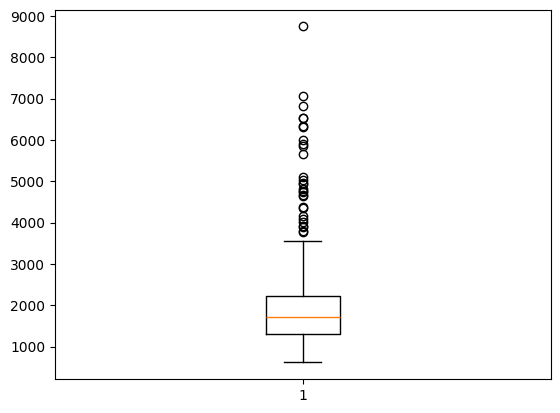

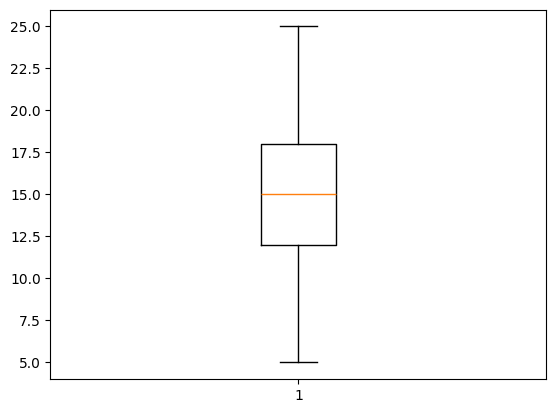

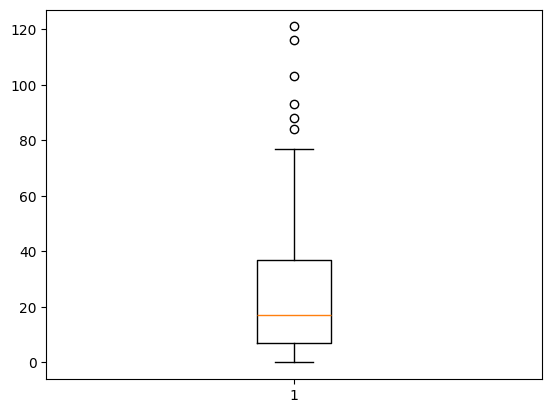

In [16]:
plt.boxplot(rfm['monetary'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['recency'])
plt.show()

In [17]:
q1_rev = rfm['monetary'].quantile(0.05)
q3_rev= rfm['monetary'].quantile(0.95)
IQR = q3_rev - q1_rev
rfm = rfm[(rfm['monetary'] >= q1_rev - 1.5*IQR) & (rfm['monetary'] <= q3_rev + 1.5*IQR)]

q1_freq = rfm['frequency'].quantile(0.05)
q3_freq = rfm['frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
rfm = rfm[(rfm['frequency'] >= q1_freq - 1.5*IQR) & (rfm['frequency'] <= q3_freq + 1.5*IQR)]

q1_rec = rfm['recency'].quantile(0.05)
q3_rec = rfm['recency'].quantile(0.95)
IQR = q3_rec - q1_rec
rfm = rfm[(rfm['recency'] >= q1_rec - 1.5*IQR) & (rfm['recency'] <= q3_rec + 1.5*IQR)]


In [18]:
#Scaling the features
scale = StandardScaler()
cols = ['monetary', 'frequency', 'recency']
rfm_scaler = scale.fit_transform(rfm[cols])

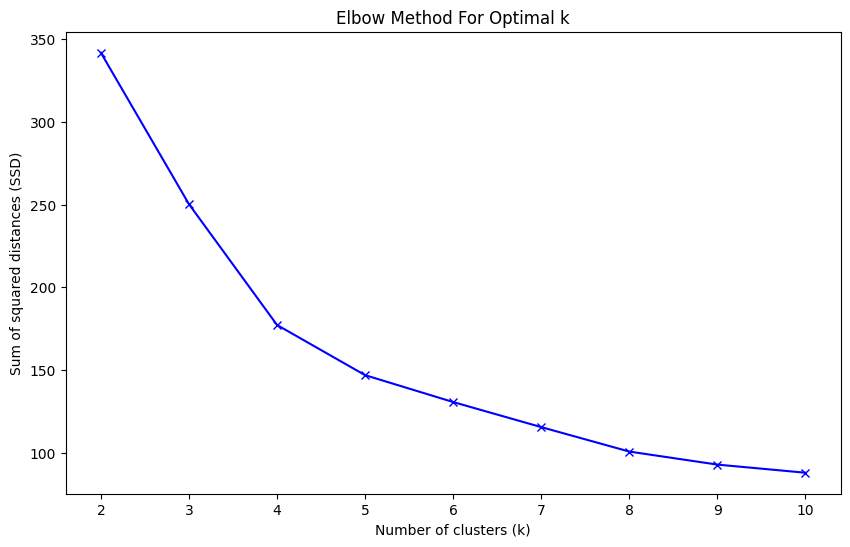

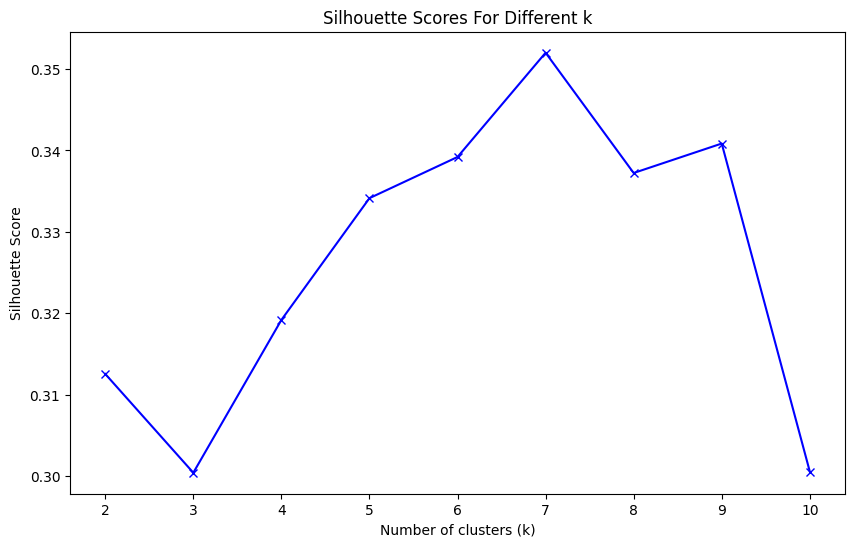

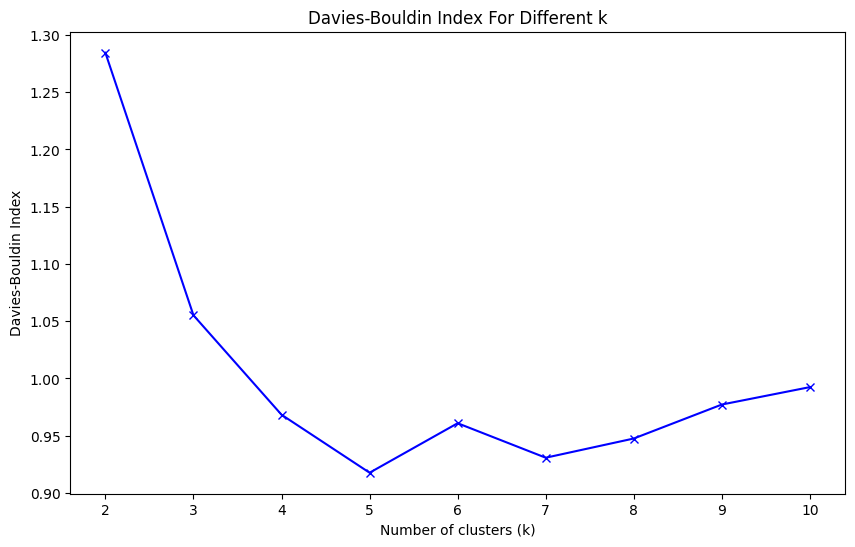

In [19]:
rfm_scaled = pd.DataFrame(rfm_scaler, columns=cols)
rfm_scaled.head()

# Select the relevant columns for clustering
columns_for_clustering = ['recency', 'frequency', 'monetary']
X = rfm_scaled[columns_for_clustering]

# Check for missing values and handle them (if any)
ssd = []
silhouette_scores = []
dbi_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    dbi_avg = davies_bouldin_score(X_scaled, kmeans.labels_)
    dbi_scores.append(dbi_avg)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.show()

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(K, dbi_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index For Different k')
plt.show()


Missing Values:
recency      0
frequency    0
monetary     0
dtype: int64


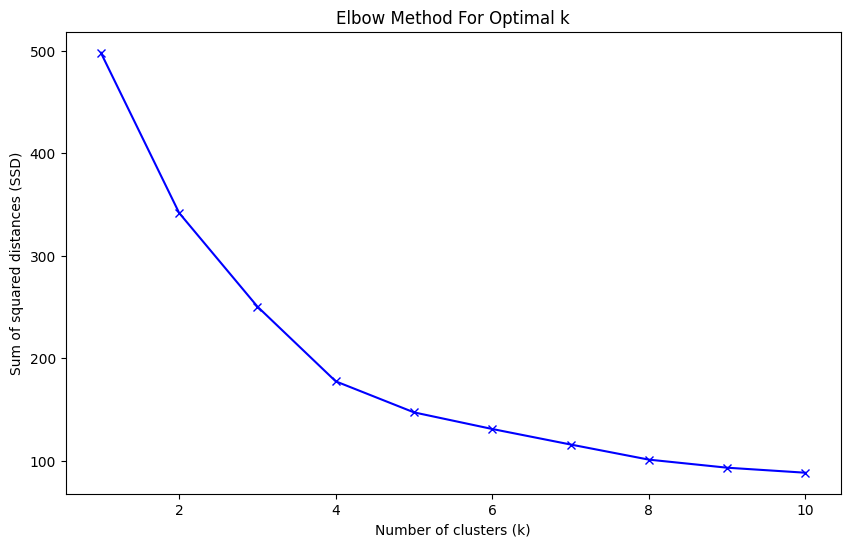

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume the rfm DataFrame is already created as per your code
rf = pd.merge(monetary_contributed, frequency, on='CustomerID', how='inner')
rfm = pd.merge(rf, recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'monetary', 'frequency', 'recency']
rfm['recency'] = rfm['recency'].dt.days
rfm.head()

# Select the relevant columns for clustering
columns_for_clustering = ['recency', 'frequency', 'monetary']
X = rfm[columns_for_clustering]

# Check for missing values and handle them (if any)
print("\nMissing Values:")
print(X.isnull().sum())

# Fill missing values if necessary (example: filling with median)
X = X.fillna(X.median())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement the Elbow Method to find the optimal number of clusters
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()


# Hopkins Statistic

In [21]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(rfm_scaled)

np.float64(0.7353992670513582)

# Building Model (Hierarchial Cluster)

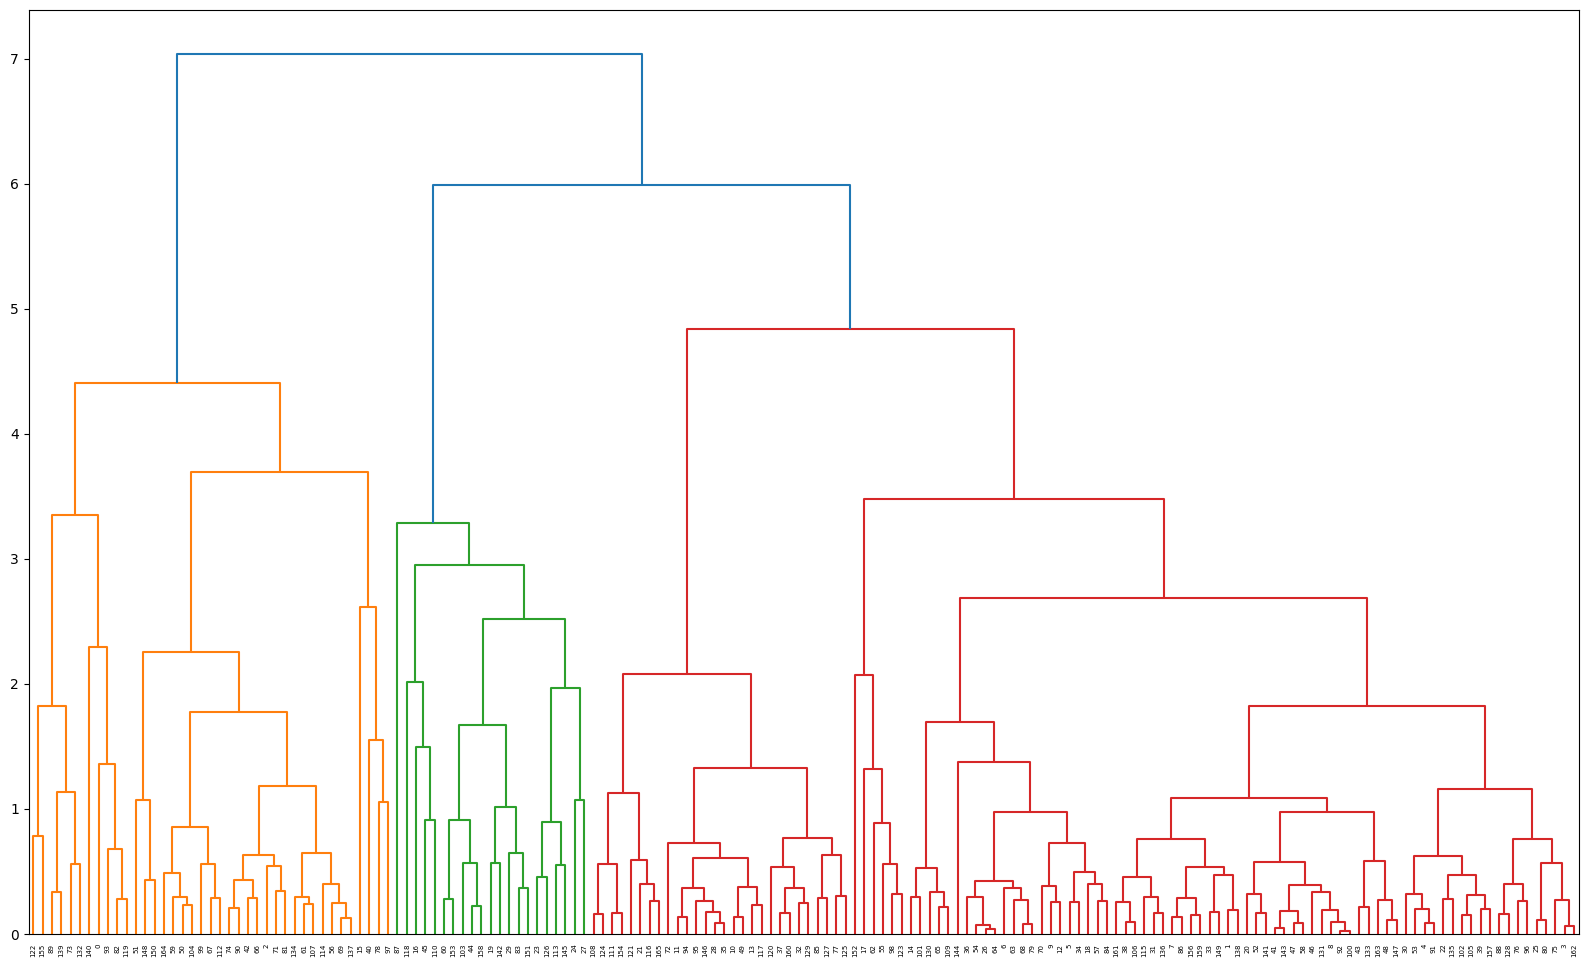

In [23]:
# complete linkage
plt.figure(figsize=(20,12))

mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [24]:
# clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 3, 1, 1, 3, 1, 2,
       1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1,
       3, 3, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 3, 1, 2, 1, 3,
       1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 2, 2, 3, 0, 2, 2, 0, 1, 2, 2, 3, 2, 1, 2, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 0, 3, 1, 3,
       2, 0, 1, 1, 3, 1, 2, 1, 1, 1, 0, 2])

In [25]:
# Assign cluster labels
pd.set_option('display.max_rows', None)
rfm['cluster_labels'] = cluster_labels

# Tampilkan 90 baris pertama
rfm.head(190)

# Simpan hasil ke file CSV
#rfm.to_csv('rfm_with_clusters.csv', index=False)

,CustomerID,monetary,frequency,recency,cluster_labels
0,3957,978.0,10,121,0
1,3958,1210.0,16,17,1
2,3959,1824.0,17,48,0
3,3960,1262.0,13,17,1
4,3961,1592.0,15,33,1
5,3962,1285.0,10,6,1
6,3963,1297.0,12,11,1
7,3964,1739.0,15,16,1
8,3965,1556.0,15,3,1
9,3966,1337.0,11,14,1


<Axes: xlabel='cluster_labels', ylabel='recency'>

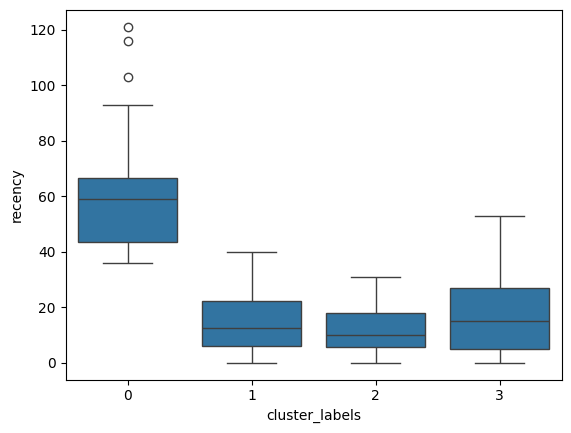

In [26]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=rfm)

<Axes: xlabel='cluster_labels', ylabel='frequency'>

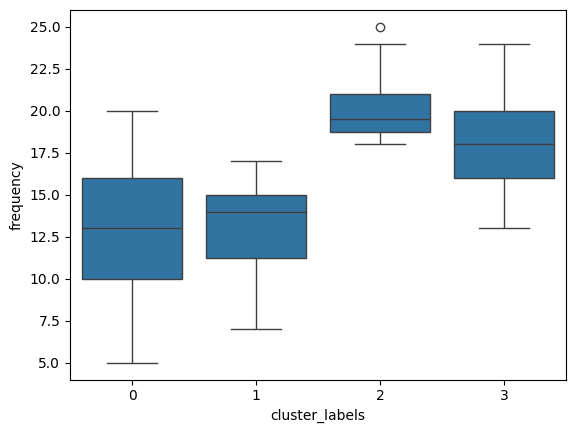

In [27]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=rfm)

<Axes: xlabel='cluster_labels', ylabel='monetary'>

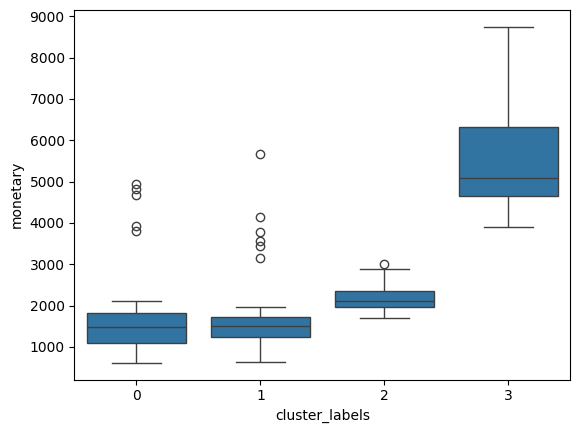

In [28]:
# plots
sns.boxplot(x='cluster_labels', y='monetary', data=rfm)

In [29]:
import pandas as pd

rfm_df = pd.DataFrame(rfm)


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Select the RFM columns
rfm_columns = ['monetary', 'frequency', 'recency']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the data
rfm_normalized = scaler.fit_transform(rfm_df[rfm_columns])

# Create a new DataFrame with the normalized data
rfm_normalized_df = pd.DataFrame(rfm_normalized, columns=rfm_columns)

# Add the CustomerID back to the normalized dataframe
rfm_normalized_df['CustomerID'] = rfm_df['CustomerID']

# Display the normalized dataframe
rfm_normalized_df.head(167)


,monetary,frequency,recency,CustomerID
0,0.044532,0.25,1.000000,3957
1,0.073072,0.55,0.140496,3958
2,0.148604,0.60,0.396694,3959
3,0.079469,0.40,0.140496,3960
4,0.120064,0.50,0.272727,3961
5,0.082298,0.25,0.049587,3962
6,0.083774,0.35,0.090909,3963
7,0.138147,0.50,0.132231,3964
8,0.115635,0.50,0.024793,3965
9,0.088695,0.30,0.115702,3966


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Contoh data
X = rfm_normalized_df[['monetary', 'frequency', 'recency']]  # Pilih fitur untuk clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisasi data

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan kolom cluster_labels ke DataFrame rfm
rfm_normalized_df['cluster_labels'] = cluster_labels

# Menampilkan hasil clustering
print(rfm_normalized_df.head(180))

# Simpan hasil ke file CSV
rfm.to_csv('rfm_with_clusters22.csv', index=False)

     monetary  frequency   recency  CustomerID  cluster_labels
0    0.044532       0.25  1.000000        3957               2
1    0.073072       0.55  0.140496        3958               0
2    0.148604       0.60  0.396694        3959               0
3    0.079469       0.40  0.140496        3960               3
4    0.120064       0.50  0.272727        3961               3
5    0.082298       0.25  0.049587        3962               3
6    0.083774       0.35  0.090909        3963               3
7    0.138147       0.50  0.132231        3964               3
8    0.115635       0.50  0.024793        3965               3
9    0.088695       0.30  0.115702        3966               3
10   0.164227       0.65  0.041322        3967               0
11   0.165211       0.75  0.082645        3968               0
12   0.043425       0.30  0.132231        3969               3
13   0.188953       0.65  0.082645        3970               0
14   0.062000       0.30  0.272727        3971         

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Contoh data
X = rfm[['monetary', 'frequency', 'recency']]  # Pilih fitur untuk clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisasi data

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan kolom cluster_labels ke DataFrame rfm
rfm['cluster_labels'] = cluster_labels

# Menampilkan hasil clustering
print(rfm.head(180))

rfm.to_csv('rfm_with_clusters5.csv', index=False)

     CustomerID  monetary  frequency  recency  cluster_labels
0          3957     978.0         10      121               2
1          3958    1210.0         16       17               0
2          3959    1824.0         17       48               0
3          3960    1262.0         13       17               3
4          3961    1592.0         15       33               3
5          3962    1285.0         10        6               3
6          3963    1297.0         12       11               3
7          3964    1739.0         15       16               3
8          3965    1556.0         15        3               3
9          3966    1337.0         11       14               3
10         3967    1951.0         18        5               0
11         3968    1959.0         20       10               0
12         3969     969.0         11       16               3
13         3970    2152.0         18       10               0
14         3971    1120.0         11       33               3
15      

In [33]:
from sklearn.cluster import KMeans
import pandas as pd

# Misalkan df_rfm adalah DataFrame dengan kolom Recency, Frequency, Monetary, dan cluster_labels
# Anda sudah melakukan clustering dan menambahkan kolom cluster_labels ke df_rfm

# Pilih fitur untuk clustering (Recency, Frequency, Monetary)
X = rfm[['recency', 'frequency', 'monetary']]

# Normalisasi data jika diperlukan
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Misalkan Anda sudah menentukan jumlah cluster optimal dan melakukan clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Tambahkan kolom cluster_labels ke df_rfm
rfm['cluster_labels'] = cluster_labels

# Temukan centroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Konversi centroids ke DataFrame untuk kemudahan analisis
df_centroids = pd.DataFrame(centroids, columns=['recency', 'frequency', 'monetary'])

# Tampilkan DataFrame centroids
print("Centroids:")
print(df_centroids)

Centroids:
    recency  frequency  monetary
0 -0.338912  -0.575641 -0.470016
1  1.851692  -0.977089 -0.381214
2 -0.359071   0.872360 -0.165307
3 -0.227489   0.678645  2.123594


In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load your data (replace 'rfm_with_clusters.csv' with your actual data file)
df_customer = pd.read_csv('rfm_with_clusters.csv')

# Assuming you already have normalized columns 'recency_normalized', 'frequency_normalized', 'monetary_normalized'
# If not normalized, perform Min-Max normalization
scaler = MinMaxScaler()
df_customer[['recency_normalized', 'frequency_normalized', 'monetary_normalized']] = scaler.fit_transform(df_customer[['recency', 'frequency', 'monetary']])

In [35]:
# Select normalized features for clustering
X = df_customer[['recency_normalized', 'frequency_normalized', 'monetary_normalized']]

# Define the number of clusters (adjust this as per your analysis)
num_clusters = 4

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering on the selected features
df_customer['cluster_labels'] = kmeans.fit_predict(X)

In [36]:
# Display the first few rows of the DataFrame with cluster labels
print("Data with Cluster Labels:")
print(df_customer.head())

# Display centroids (cluster centers)
centroids = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=['recency_normalized', 'frequency_normalized', 'monetary_normalized'])
print("\nCentroids (Cluster Centers):")
print(df_centroids)

Data with Cluster Labels:
   CustomerID  monetary  frequency  recency  cluster_labels  \
0        3957     978.0         10      121               1   
1        3958    1210.0         16       17               2   
2        3959    1824.0         17       48               3   
3        3960    1262.0         13       17               2   
4        3961    1592.0         15       33               2   

   recency_normalized  frequency_normalized  monetary_normalized  
0            1.000000                  0.25             0.044532  
1            0.140496                  0.55             0.073072  
2            0.396694                  0.60             0.148604  
3            0.140496                  0.40             0.079469  
4            0.272727                  0.50             0.120064  

Centroids (Cluster Centers):
   recency_normalized  frequency_normalized  monetary_normalized
0            0.161846              0.618750             0.594651
1            0.582810            


Missing Values:
recency      0
frequency    0
monetary     0
dtype: int64
Number of clusters: 2, Silhouette Score: 0.31255566177358923
Number of clusters: 3, Silhouette Score: 0.3004264889241433
Number of clusters: 4, Silhouette Score: 0.3191896523995019
Number of clusters: 5, Silhouette Score: 0.33414126027489416
Number of clusters: 6, Silhouette Score: 0.33919737839295694
Number of clusters: 7, Silhouette Score: 0.35199991978919515
Number of clusters: 8, Silhouette Score: 0.3372309452043521
Number of clusters: 9, Silhouette Score: 0.34084855445482676
Number of clusters: 10, Silhouette Score: 0.3005692001514774


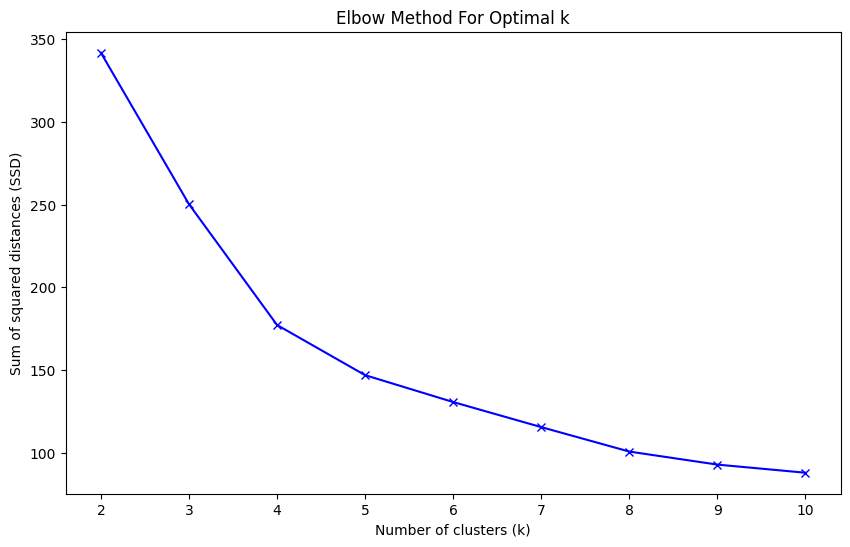

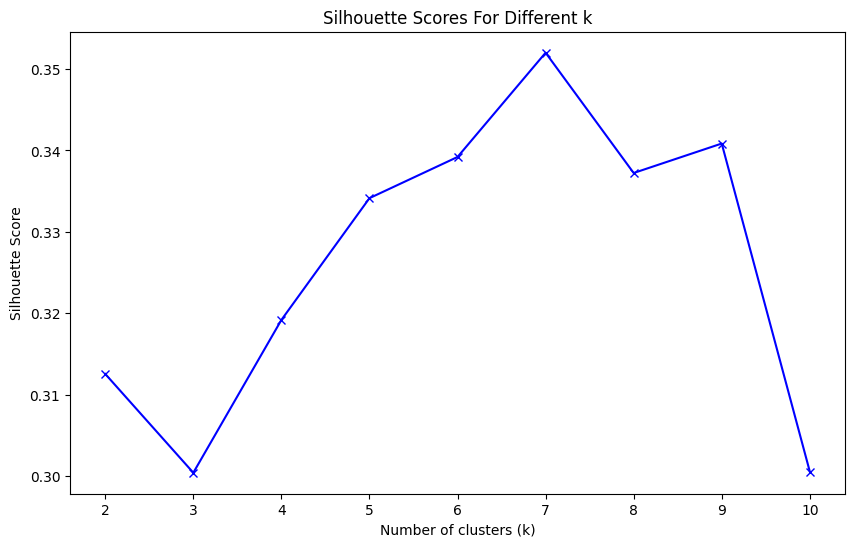

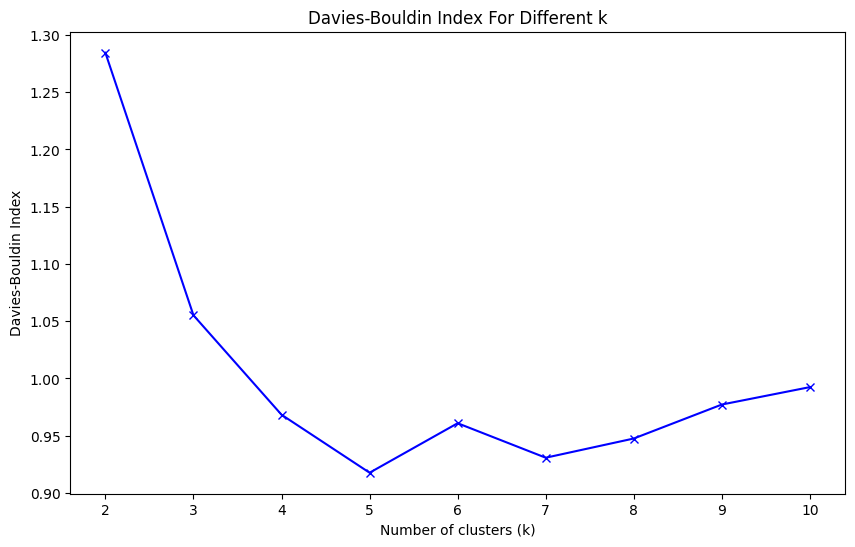

In [37]:
#merging data
rf = pd.merge(monetary_contributed, frequency, on='CustomerID', how='inner')
rfm_normalized_df = pd.merge(rf, recency, on='CustomerID', how='inner')
rfm_normalized_df.columns = ['CustomerID', 'monetary', 'frequency', 'recency']
rfm_normalized_df['recency'] = rfm_normalized_df['recency'].dt.days
rfm_normalized_df.head()

# Select the relevant columns for clustering
columns_for_clustering = ['recency', 'frequency', 'monetary']
X = rfm_normalized_df[columns_for_clustering]

# Check for missing values and handle them (if any)
print("\nMissing Values:")
print(X.isnull().sum())

# Fill missing values if necessary (example: filling with median)
X = X.fillna(X.median())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement the Elbow Method to find the optimal number of clusters
ssd = []
silhouette_scores = []
dbi_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    dbi_avg = davies_bouldin_score(X_scaled, kmeans.labels_)
    dbi_scores.append(dbi_avg)
    
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.show()

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(K, dbi_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index For Different k')
plt.show()